## Data Science Bootcamp

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 231](#1)
* [Ćwiczenie 232](#2)
* [Ćwiczenie 233](#3)
* [Ćwiczenie 234](#4)
* [Ćwiczenie 235](#5)
* [Ćwiczenie 236](#6)
* [Ćwiczenie 237](#7)
* [Ćwiczenie 238](#8)
* [Ćwiczenie 239](#9)
* [Ćwiczenie 240](#10)

### <a name='0'></a>Import biblioteki

In [18]:
import numpy as np
import pandas as pd

np.__version__

'1.21.6'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [19]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.8.2'

Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [20]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

Sprawdź rozmiar zbiorów treningowych i testowych.

In [21]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### <a name='2'></a> Ćwiczenie 232 
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

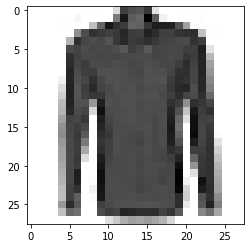

In [22]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40], cmap='gray_r')

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [23]:
y_train[40]

6

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [24]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [25]:
from tensorflow.keras.models import Sequential

Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [26]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [27]:
model = Sequential()

Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [28]:
model.add(Flatten(input_shape=(28, 28)))

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [29]:
model.add(Dense(units=128, activation='relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [30]:
model.add(Dense(units=10, activation='softmax'))

Wyświetl podsumowanie modelu.

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [32]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [33]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5263 - accuracy: 0.8139 - val_loss: 0.4667 - val_accuracy: 0.8328
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3897 - accuracy: 0.8585 - val_loss: 0.3913 - val_accuracy: 0.8618
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3547 - accuracy: 0.8736 - val_loss: 0.3675 - val_accuracy: 0.8749
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3325 - accuracy: 0.8804 - val_loss: 0.3711 - val_accuracy: 0.8769
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3176 - accuracy: 0.8873 - val_loss: 0.4104 - val_accuracy: 0.8664
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8898 - val_loss: 0.3534 - val_accuracy: 0.8819
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.8959 - val_loss: 0.3533 - val_accuracy:

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [35]:
#y_pred = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
#lub
#predictions = (model.predict(x_test) > 0.5).astype("int32")

In [37]:
predict_x

array([[3.5056134e-09, 1.3059489e-15, 9.4838686e-11, ..., 5.4728538e-03,
        1.7129651e-07, 9.9445772e-01],
       [3.1843592e-10, 9.1682164e-24, 9.9999952e-01, ..., 3.0778411e-16,
        3.9093933e-18, 3.8438012e-15],
       [6.2933518e-13, 1.0000000e+00, 1.4846590e-12, ..., 2.0189247e-21,
        1.4175126e-15, 3.3213238e-22],
       ...,
       [2.9188506e-05, 1.7563109e-23, 9.6459087e-07, ..., 4.8311801e-08,
        9.9995673e-01, 1.9616303e-10],
       [2.5983321e-12, 9.9999988e-01, 1.6675546e-11, ..., 7.7102306e-13,
        7.8990789e-14, 3.1294107e-14],
       [4.6732637e-08, 1.9155857e-08, 2.0920691e-06, ..., 2.4641843e-03,
        7.4935314e-04, 1.5694942e-04]], dtype=float32)

In [38]:
classes_x

array([9, 2, 1, ..., 8, 1, 5])

In [41]:
y_pred=classes_x.copy()

Zbuduj macierz konfuzji (macierz pomyłek).

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[800,   1,  38,  62,   4,   0,  83,   0,  12,   0],
       [  1, 967,   2,  24,   3,   0,   2,   0,   1,   0],
       [ 11,   1, 815,  16, 130,   0,  24,   0,   3,   0],
       [ 18,   7,  23, 904,  30,   2,  13,   0,   3,   0],
       [  0,   0, 105,  32, 838,   0,  23,   0,   2,   0],
       [  0,   0,   0,   1,   0, 949,   0,  28,   3,  19],
       [112,   2, 148,  58, 108,   0, 555,   0,  16,   1],
       [  0,   0,   0,   0,   0,  11,   0, 966,   1,  22],
       [  1,   0,   2,   7,   9,   2,   2,   6, 971,   0],
       [  3,   0,   0,   1,   0,   5,   1,  48,   1, 941]])

### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [43]:
results = pd.DataFrame(y_pred, columns=['prediction'])
results

,prediction
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [44]:
results['y_test'] = y_test
results

,prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [45]:
results['is_misclassified'] = (results['prediction'] != results['y_test']).astype('int')
results

,prediction,y_test,is_misclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [46]:
results.to_csv('results.csv', index=False)

In [47]:
!head results.csv

prediction,y_test,is_misclassified
9,9,0
2,2,0
1,1,0
1,1,0
6,6,0
1,1,0
4,4,0
6,6,0
5,5,0
